## Student Admission Classification with Logistic Regression

In [19]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# Load CSV
df = pd.read_csv("student_admission_dataset.csv")

# Quick info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB
None


,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [21]:
# Encode admission status
le = LabelEncoder()
df['Admission_Status'] = le.fit_transform(df['Admission_Status'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
df.head()


Label mapping: {'Accepted': np.int64(0), 'Rejected': np.int64(1), 'Waitlisted': np.int64(2)}


,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,1
1,2.54,974,8,1
2,2.91,909,9,1
3,2.83,1369,5,0
4,3.60,1536,7,0


In [22]:
# Features & target
X = df[['GPA', 'SAT_Score', 'Extracurricular_Activities']]
y = df['Admission_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train multinomial logistic regression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train, y_train)

print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy :", log_reg.score(X_test, y_test))

Train accuracy: 0.415
Test accuracy : 0.38


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [23]:
# Predictions
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.38

Confusion Matrix:
 [[ 3  3 10]
 [ 6  9  1]
 [ 5  6  7]]

Classification Report:
               precision    recall  f1-score   support

    Accepted       0.21      0.19      0.20        16
    Rejected       0.50      0.56      0.53        16
  Waitlisted       0.39      0.39      0.39        18

    accuracy                           0.38        50
   macro avg       0.37      0.38      0.37        50
weighted avg       0.37      0.38      0.37        50



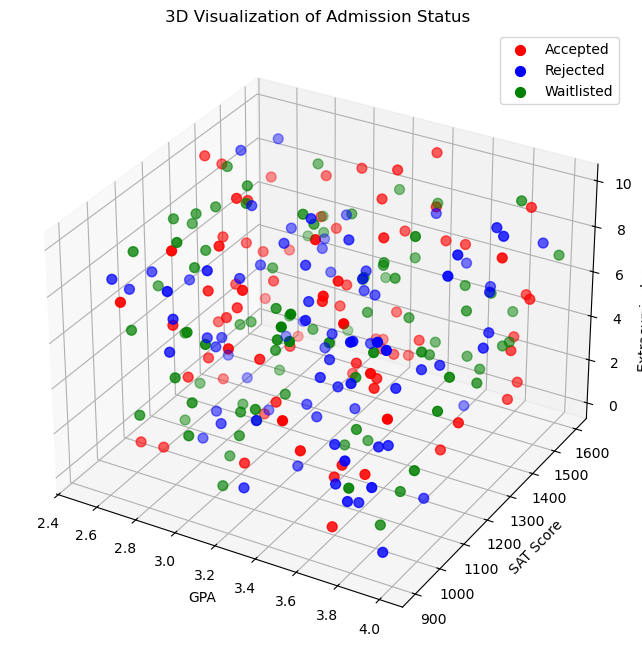

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter of actual data
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter by class
colors = ['red', 'blue', 'green']
for i, cls in enumerate(le.classes_):
    subset = df[df['Admission_Status'] == i]
    ax.scatter(subset['GPA'], subset['SAT_Score'], subset['Extracurricular_Activities'],
               c=colors[i], label=cls, s=50)

ax.set_xlabel("GPA")
ax.set_ylabel("SAT Score")
ax.set_zlabel("Extracurricular Activities")
ax.legend()
plt.title("3D Visualization of Admission Status")
plt.show()

## Task Is Done!